In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df=pd.read_csv('/home/saumyaryan/Documents/PR/PR_201/Files/creditcard.csv')

In [7]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
fraud = df[df['Class'] == 1]
legit = df[df['Class'] == 0]

print('Fraudulent Transactions:', len(fraud))
print('Legitimate Transactions:', len(legit))

Fraudulent Transactions: 492
Legitimate Transactions: 284315


In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split # Import train_test_split


df.iloc[:, 1:30] = StandardScaler().fit_transform(df.iloc[:, 1:30])

fraud_train, fraud_test = train_test_split(fraud, test_size=0.3, random_state=42)
legit_train, legit_test = train_test_split(legit, test_size=0.3, random_state=42)

train_data = pd.concat([fraud_train, legit_train])
train_data = train_data.sample(frac=1, random_state=42).reset_index(drop=True)
print('Training Data Shape:', train_data.shape)

print('Fraud Data test Shape: ', fraud_test.shape)
print('Legitimate Data test Shape: ', legit_test.shape)

train_data = train_data.values
fraud_test = fraud_test.values
legit_test = legit_test.values

x_train = train_data[:, 1:30]
y_train = train_data[:, 30]


x_fraud_test = fraud_test[:, 1:30]
y_fraud_test = fraud_test[:, 30]

x_legit_test = legit_test[:, 1:30]
y_legit_test = legit_test[:, 30]

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_fraud_test = scaler.transform(x_fraud_test)
x_legit_test = scaler.transform(x_legit_test)

print('X_train Shape:', x_train.shape)
print('Y_train Shape:', y_train.shape)
print('X_fraud_test Shape:', x_fraud_test.shape)
print('Y_fraud_test Shape:', y_fraud_test.shape)
print('X_legit_test Shape:', x_legit_test.shape)
print('Y_legit_test Shape:', y_legit_test.shape)

Training Data Shape: (199364, 31)
Fraud Data test Shape:  (148, 31)
Legitimate Data test Shape:  (85295, 31)
X_train Shape: (199364, 29)
Y_train Shape: (199364,)
X_fraud_test Shape: (148, 29)
Y_fraud_test Shape: (148,)
X_legit_test Shape: (85295, 29)
Y_legit_test Shape: (85295,)


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix

def evaluate_model(model, x_train, y_train, x_legit_test, y_legit_test, x_fraud_test, y_fraud_test):
    """
    Evaluates a given model on training and test data.

    Args:
        model: The machine learning model to evaluate.
        x_train, y_train: Training data and labels.
        x_legit_test, y_legit_test: Test data and labels for legitimate transactions.
        x_fraud_test, y_fraud_test: Test data and labels for fraudulent transactions.

    Returns:
        A dictionary containing:
            - Legitimate accuracy
            - Fraud accuracy
            - Confusion matrix for legitimate and fraudulent tests
    """
    # Train the model
    model.fit(x_train, y_train)

    # Predict on legitimate and fraudulent test sets
    y_pred_legit = model.predict(x_legit_test)
    y_pred_fraud = model.predict(x_fraud_test)

    # Calculate confusion matrices
    cm_legit = confusion_matrix(y_legit_test, y_pred_legit)
    cm_fraud = confusion_matrix(y_fraud_test, y_pred_fraud)

    # Evaluate accuracies
    accuracy_legit = model.score(x_legit_test, y_legit_test)
    accuracy_fraud = model.score(x_fraud_test, y_fraud_test)

    return {
        "accuracy_legit": accuracy_legit,
        "accuracy_fraud": accuracy_fraud,
        "confusion_matrix_legit": cm_legit,
        "confusion_matrix_fraud": cm_fraud
    }

# Function to plot confusion matrix
def plot_confusion_matrix(cm, title='Confusion Matrix', labels=['Legitimate', 'Fraudulent']):
    """
    Plots a confusion matrix using seaborn heatmap.

    Args:
        cm: Confusion matrix to plot.
        title: Title of the plot.
        labels: List of class labels (default ['Legitimate', 'Fraudulent']).
    """
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


# Models to evaluate
models = {
    "Decision Tree": DecisionTreeClassifier(max_depth=4, random_state=42),
    "SVM": SVC(kernel='rbf', random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=50, random_state=42),
    "GaussianNB": GaussianNB(),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}


Evaluating Decision Tree...
Decision Tree Legit Accuracy: 0.95895
Decision Tree Fraud Accuracy: 0.91892
Confusion Matrix for Legitimate Test Set:


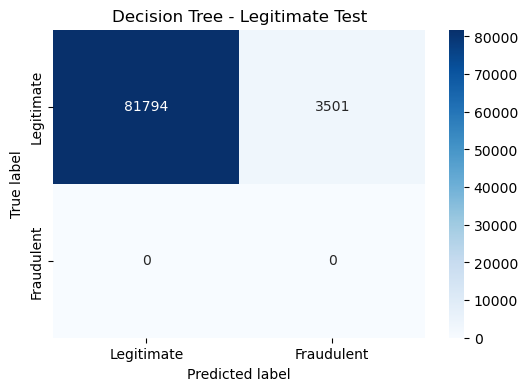

Confusion Matrix for Fraudulent Test Set:


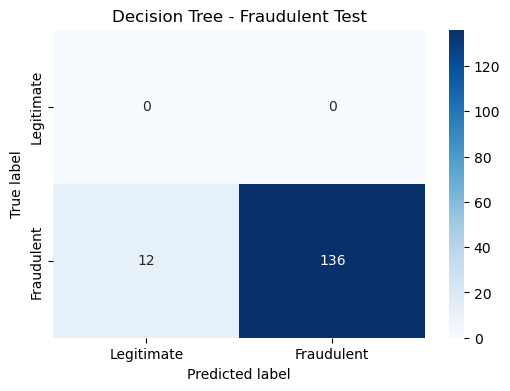

Evaluating SVM...
SVM Legit Accuracy: 0.98720
SVM Fraud Accuracy: 0.87838
Confusion Matrix for Legitimate Test Set:


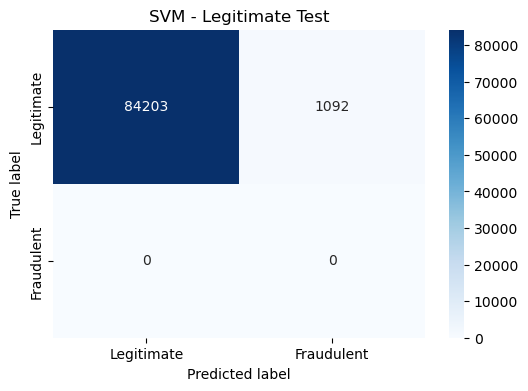

Confusion Matrix for Fraudulent Test Set:


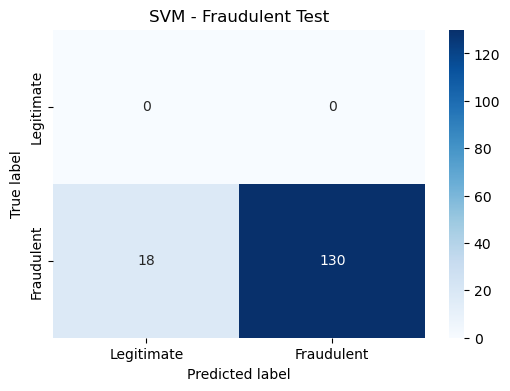

Evaluating Random Forest...
Random Forest Legit Accuracy: 0.98025
Random Forest Fraud Accuracy: 0.89865
Confusion Matrix for Legitimate Test Set:


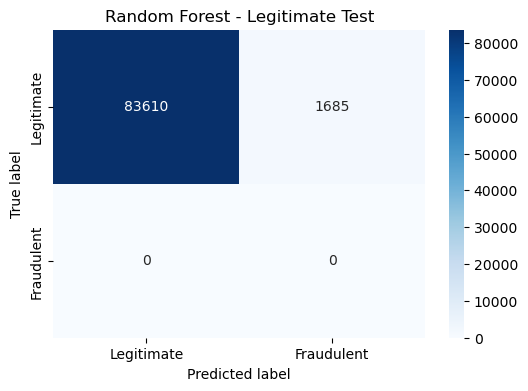

Confusion Matrix for Fraudulent Test Set:


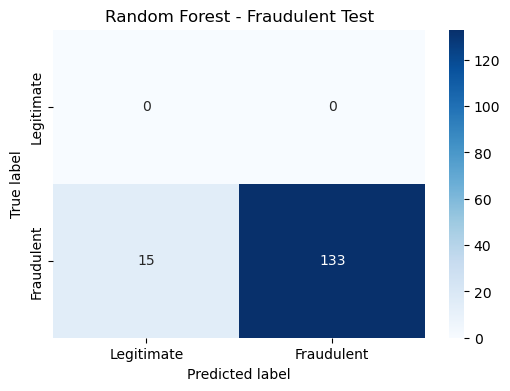

Evaluating Logistic Regression...
Logistic Regression Legit Accuracy: 0.97492
Logistic Regression Fraud Accuracy: 0.93243
Confusion Matrix for Legitimate Test Set:


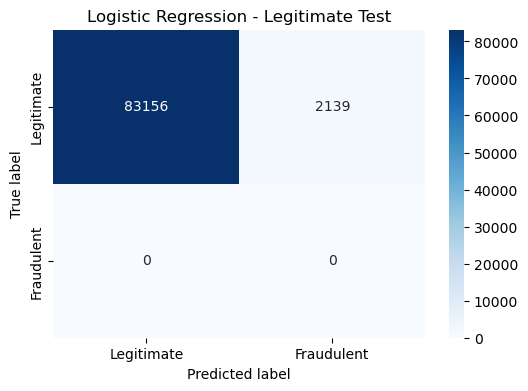

Confusion Matrix for Fraudulent Test Set:


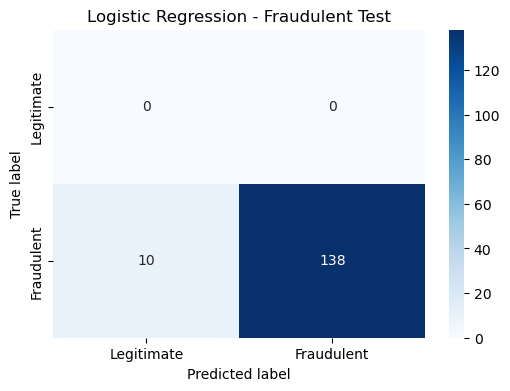

Evaluating AdaBoost...
AdaBoost Legit Accuracy: 0.95764
AdaBoost Fraud Accuracy: 0.91892
Confusion Matrix for Legitimate Test Set:


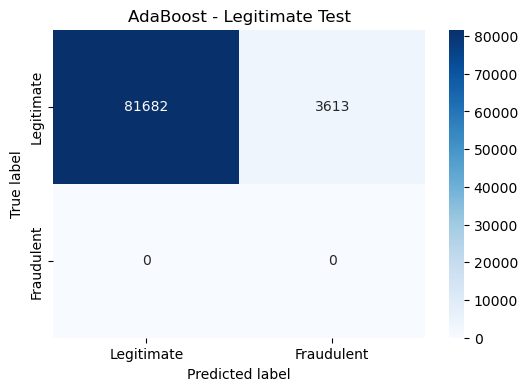

Confusion Matrix for Fraudulent Test Set:


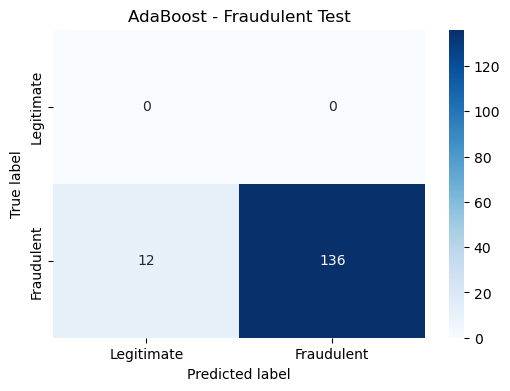

Evaluating GaussianNB...
GaussianNB Legit Accuracy: 0.97707
GaussianNB Fraud Accuracy: 0.85811
Confusion Matrix for Legitimate Test Set:


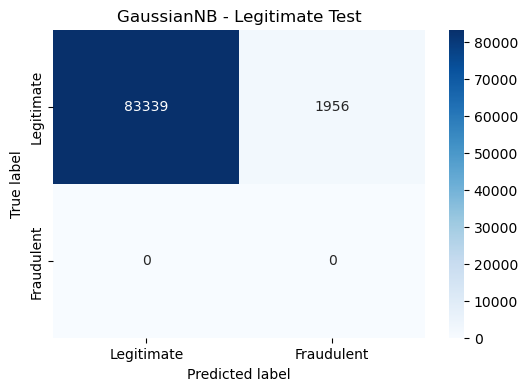

Confusion Matrix for Fraudulent Test Set:


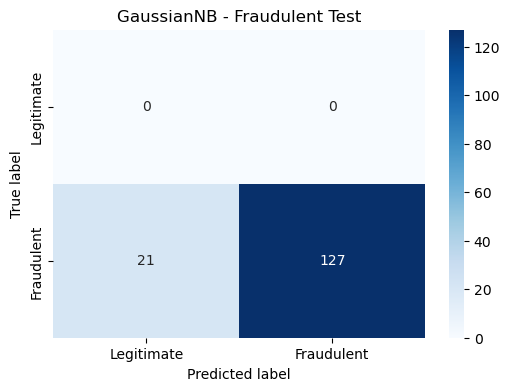

Evaluating KNN...
KNN Legit Accuracy: 0.97994
KNN Fraud Accuracy: 0.91216
Confusion Matrix for Legitimate Test Set:


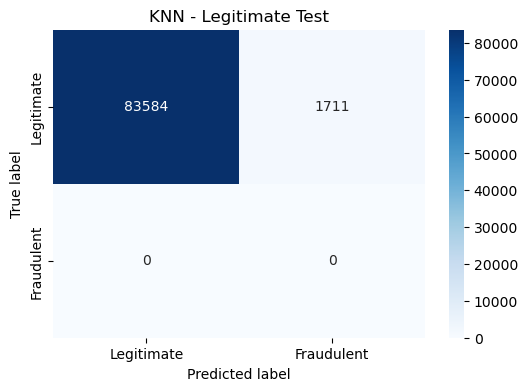

Confusion Matrix for Fraudulent Test Set:


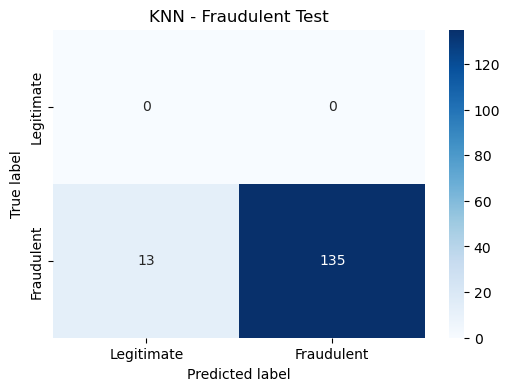

Evaluating XGBoost...
XGBoost Legit Accuracy: 0.96863
XGBoost Fraud Accuracy: 0.91216
Confusion Matrix for Legitimate Test Set:


/home/saumyaryan/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [11:06:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


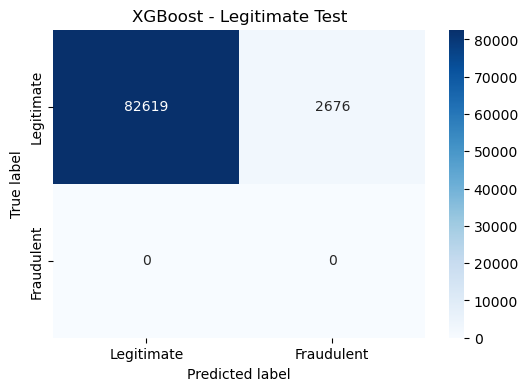

Confusion Matrix for Fraudulent Test Set:


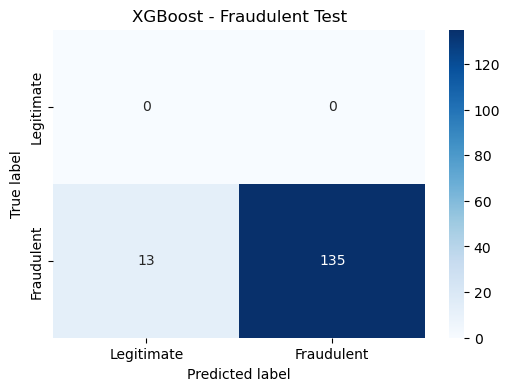

In [11]:
from imblearn.under_sampling import RandomUnderSampler

# Perform random undersampling
rus = RandomUnderSampler(random_state=42)
x_train_rus, y_train_rus = rus.fit_resample(x_train, y_train)

results_rus = {}
for model_name, model in models.items():
    print(f"Evaluating {model_name}...")
    
    # Evaluate the model using the undersampled data
    results_rus[model_name] = evaluate_model(model, x_train_rus, y_train_rus, x_legit_test, y_legit_test, x_fraud_test, y_fraud_test)
    
    print(f"{model_name} Legit Accuracy: {results_rus[model_name]['accuracy_legit']:.5f}")
    print(f"{model_name} Fraud Accuracy: {results_rus[model_name]['accuracy_fraud']:.5f}")

    # Access and plot confusion matrix for legitimate test set
    print(f"Confusion Matrix for Legitimate Test Set:")
    plot_confusion_matrix(results_rus[model_name]['confusion_matrix_legit'], title=f'{model_name} - Legitimate Test')

    # Access and plot confusion matrix for fraudulent test set
    print(f"Confusion Matrix for Fraudulent Test Set:")
    plot_confusion_matrix(results_rus[model_name]['confusion_matrix_fraud'], title=f'{model_name} - Fraudulent Test')


In [12]:
print('shape of x_train_rus', x_train_rus.shape)
print('shape of y_train_rus', y_train_rus.shape)

print(results_rus)

shape of x_train_rus (688, 29)
shape of y_train_rus (688,)
{'Decision Tree': {'accuracy_legit': 0.9589542177149891, 'accuracy_fraud': 0.918918918918919, 'confusion_matrix_legit': array([[81794,  3501],
       [    0,     0]]), 'confusion_matrix_fraud': array([[  0,   0],
       [ 12, 136]])}, 'SVM': {'accuracy_legit': 0.9871973738202708, 'accuracy_fraud': 0.8783783783783784, 'confusion_matrix_legit': array([[84203,  1092],
       [    0,     0]]), 'confusion_matrix_fraud': array([[  0,   0],
       [ 18, 130]])}, 'Random Forest': {'accuracy_legit': 0.9802450319479453, 'accuracy_fraud': 0.8986486486486487, 'confusion_matrix_legit': array([[83610,  1685],
       [    0,     0]]), 'confusion_matrix_fraud': array([[  0,   0],
       [ 15, 133]])}, 'Logistic Regression': {'accuracy_legit': 0.9749223283897063, 'accuracy_fraud': 0.9324324324324325, 'confusion_matrix_legit': array([[83156,  2139],
       [    0,     0]]), 'confusion_matrix_fraud': array([[  0,   0],
       [ 10, 138]])}, 'AdaB

Evaluating Decision Tree...
Decision Tree Legit Accuracy: 0.95895
Decision Tree Fraud Accuracy: 0.91892
Confusion Matrix for Legitimate Test Set:


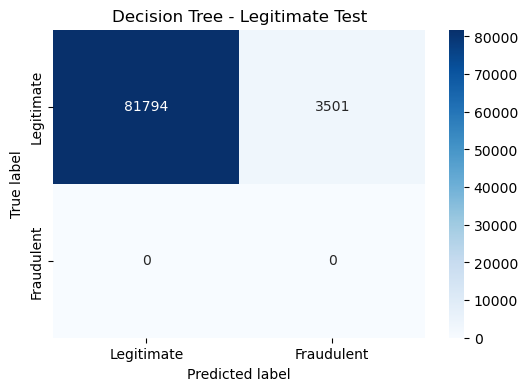

Confusion Matrix for Fraudulent Test Set:


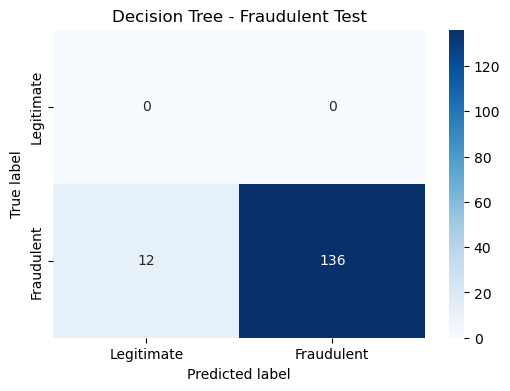

Evaluating SVM...
SVM Legit Accuracy: 0.98720
SVM Fraud Accuracy: 0.87838
Confusion Matrix for Legitimate Test Set:


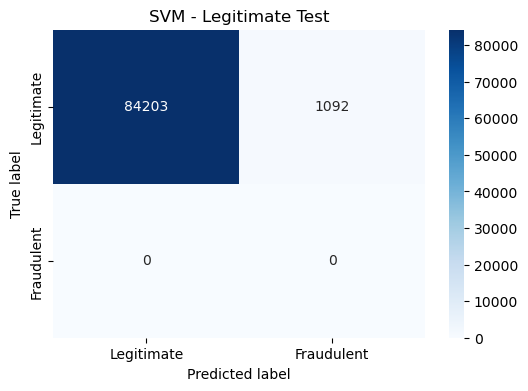

Confusion Matrix for Fraudulent Test Set:


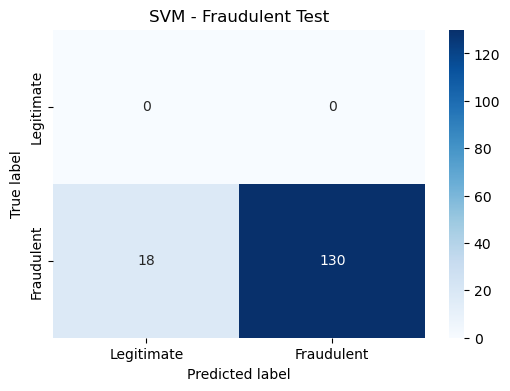

Evaluating Random Forest...
Random Forest Legit Accuracy: 0.98025
Random Forest Fraud Accuracy: 0.89865
Confusion Matrix for Legitimate Test Set:


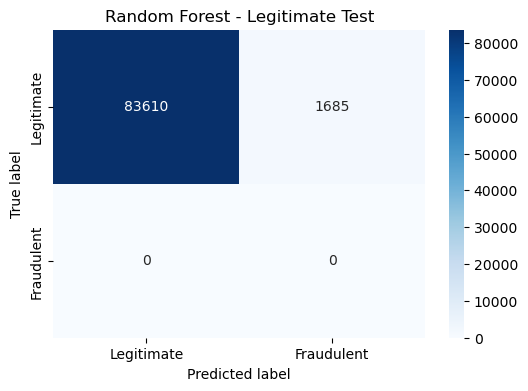

Confusion Matrix for Fraudulent Test Set:


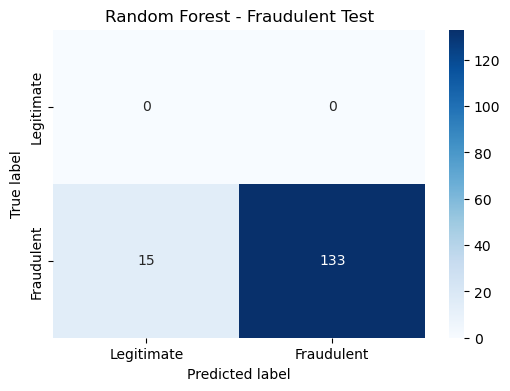

Evaluating Logistic Regression...
Logistic Regression Legit Accuracy: 0.97492
Logistic Regression Fraud Accuracy: 0.93243
Confusion Matrix for Legitimate Test Set:


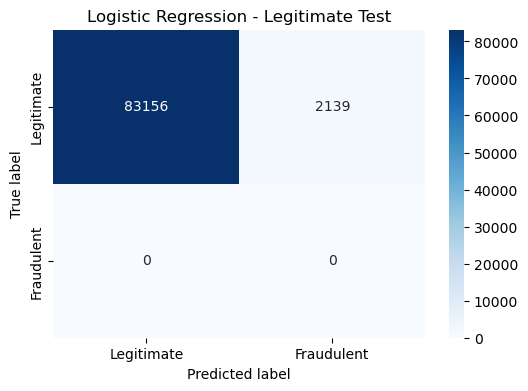

Confusion Matrix for Fraudulent Test Set:


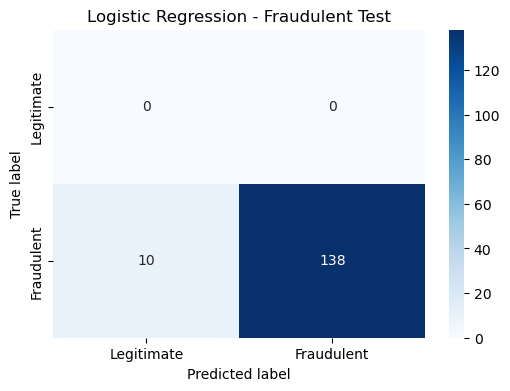

Evaluating AdaBoost...
AdaBoost Legit Accuracy: 0.95764
AdaBoost Fraud Accuracy: 0.91892
Confusion Matrix for Legitimate Test Set:


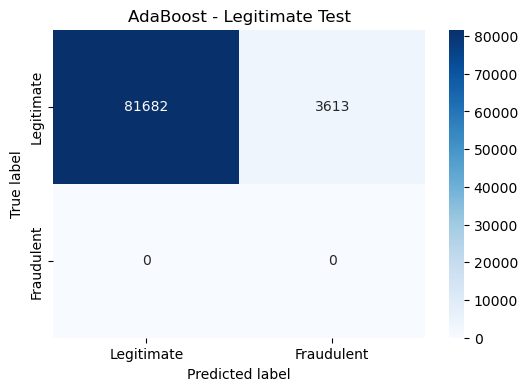

Confusion Matrix for Fraudulent Test Set:


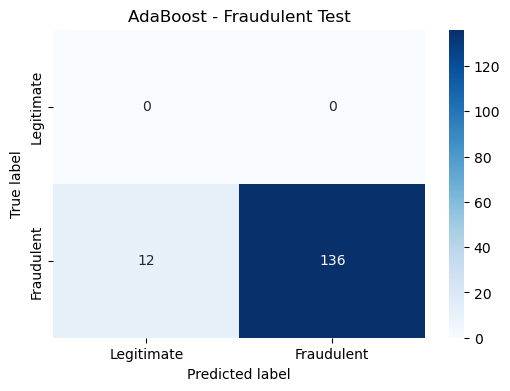

Evaluating GaussianNB...
GaussianNB Legit Accuracy: 0.97707
GaussianNB Fraud Accuracy: 0.85811
Confusion Matrix for Legitimate Test Set:


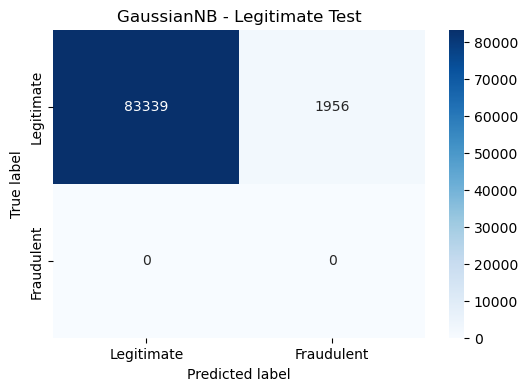

Confusion Matrix for Fraudulent Test Set:


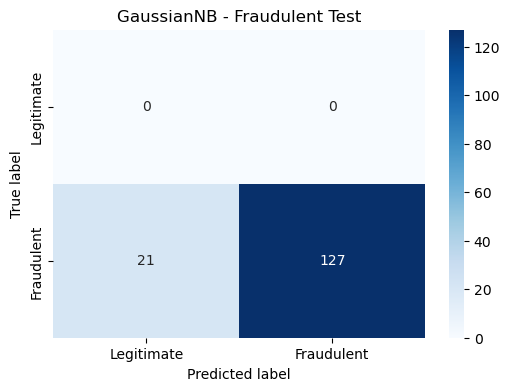

Evaluating KNN...
KNN Legit Accuracy: 0.97994
KNN Fraud Accuracy: 0.91216
Confusion Matrix for Legitimate Test Set:


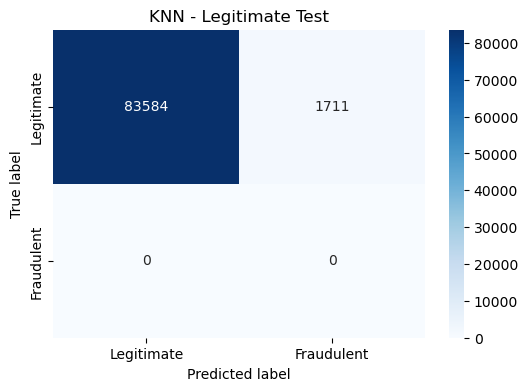

Confusion Matrix for Fraudulent Test Set:


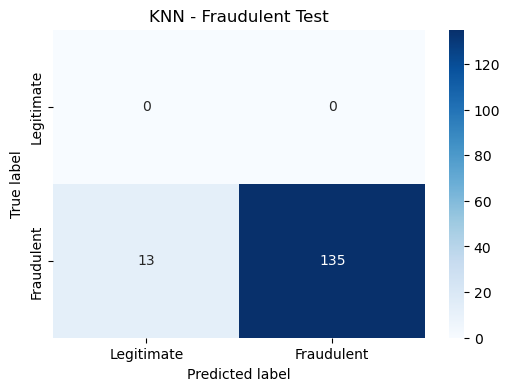

Evaluating XGBoost...
XGBoost Legit Accuracy: 0.96863
XGBoost Fraud Accuracy: 0.91216
Confusion Matrix for Legitimate Test Set:


/home/saumyaryan/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [11:07:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


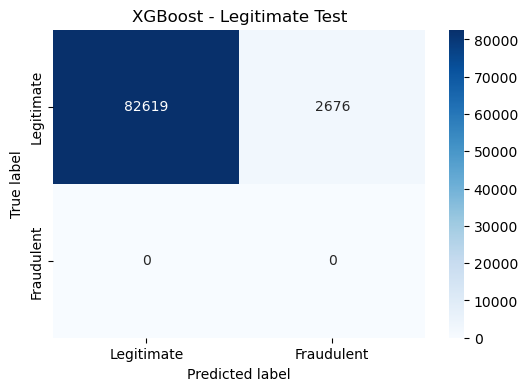

Confusion Matrix for Fraudulent Test Set:


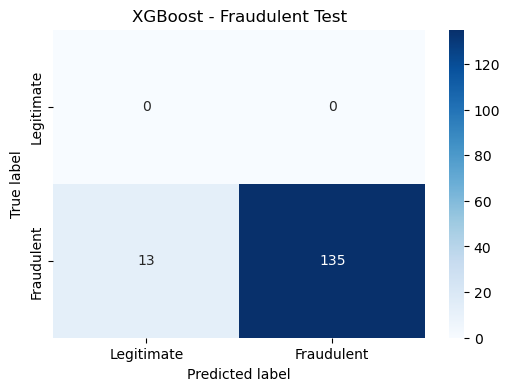

In [13]:
# Using TomekLinks undersampling
from imblearn.under_sampling import TomekLinks

tl = TomekLinks()
x_train_tl, y_train_tl = tl.fit_resample(x_train, y_train)

results_tl = {}
for model_name, model in models.items():
    print(f"Evaluating {model_name}...")
    
    # Evaluate the model using the undersampled data
    results_tl[model_name] = evaluate_model(model, x_train_rus, y_train_rus, x_legit_test, y_legit_test, x_fraud_test, y_fraud_test)
    
    print(f"{model_name} Legit Accuracy: {results_tl[model_name]['accuracy_legit']:.5f}")
    print(f"{model_name} Fraud Accuracy: {results_tl[model_name]['accuracy_fraud']:.5f}")

    # Access and plot confusion matrix for legitimate test set
    print(f"Confusion Matrix for Legitimate Test Set:")
    plot_confusion_matrix(results_tl[model_name]['confusion_matrix_legit'], title=f'{model_name} - Legitimate Test')

    # Access and plot confusion matrix for fraudulent test set
    print(f"Confusion Matrix for Fraudulent Test Set:")
    plot_confusion_matrix(results_tl[model_name]['confusion_matrix_fraud'], title=f'{model_name} - Fraudulent Test')

In [14]:
print('shape of x_train_rus', x_train_tl.shape)
print('shape of y_train_rus', y_train_tl.shape)

print(results_tl)

shape of x_train_rus (199347, 29)
shape of y_train_rus (199347,)
{'Decision Tree': {'accuracy_legit': 0.9589542177149891, 'accuracy_fraud': 0.918918918918919, 'confusion_matrix_legit': array([[81794,  3501],
       [    0,     0]]), 'confusion_matrix_fraud': array([[  0,   0],
       [ 12, 136]])}, 'SVM': {'accuracy_legit': 0.9871973738202708, 'accuracy_fraud': 0.8783783783783784, 'confusion_matrix_legit': array([[84203,  1092],
       [    0,     0]]), 'confusion_matrix_fraud': array([[  0,   0],
       [ 18, 130]])}, 'Random Forest': {'accuracy_legit': 0.9802450319479453, 'accuracy_fraud': 0.8986486486486487, 'confusion_matrix_legit': array([[83610,  1685],
       [    0,     0]]), 'confusion_matrix_fraud': array([[  0,   0],
       [ 15, 133]])}, 'Logistic Regression': {'accuracy_legit': 0.9749223283897063, 'accuracy_fraud': 0.9324324324324325, 'confusion_matrix_legit': array([[83156,  2139],
       [    0,     0]]), 'confusion_matrix_fraud': array([[  0,   0],
       [ 10, 138]])},

Evaluating Decision Tree...
Decision Tree Legit Accuracy: 0.95895
Decision Tree Fraud Accuracy: 0.91892
Confusion Matrix for Legitimate Test Set:


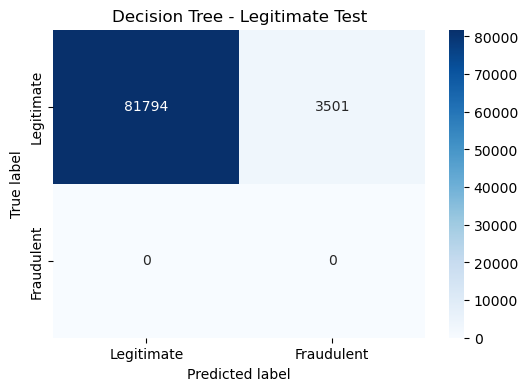

Confusion Matrix for Fraudulent Test Set:


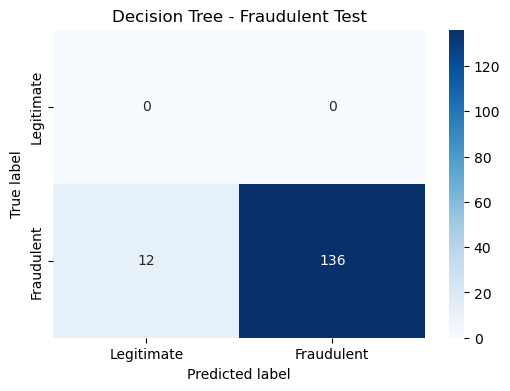

Evaluating SVM...
SVM Legit Accuracy: 0.98720
SVM Fraud Accuracy: 0.87838
Confusion Matrix for Legitimate Test Set:


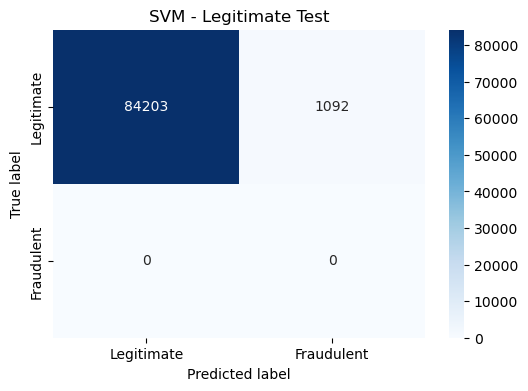

Confusion Matrix for Fraudulent Test Set:


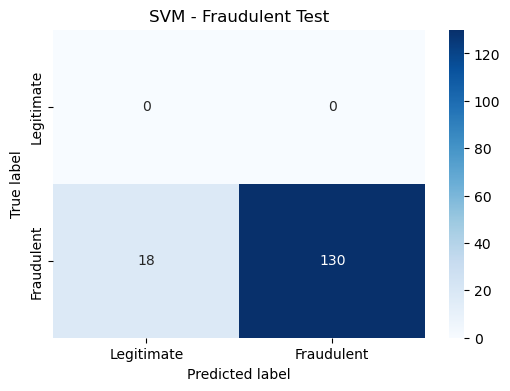

Evaluating Random Forest...
Random Forest Legit Accuracy: 0.98025
Random Forest Fraud Accuracy: 0.89865
Confusion Matrix for Legitimate Test Set:


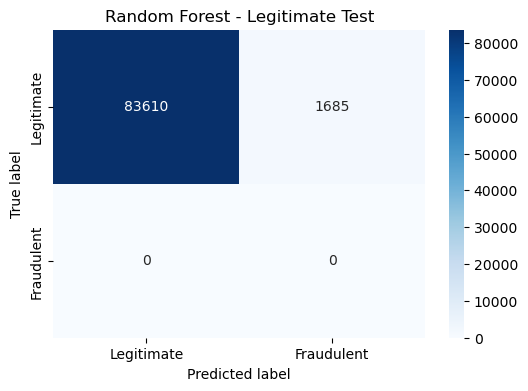

Confusion Matrix for Fraudulent Test Set:


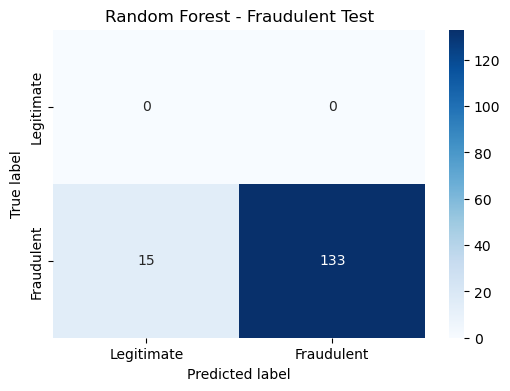

Evaluating Logistic Regression...
Logistic Regression Legit Accuracy: 0.97492
Logistic Regression Fraud Accuracy: 0.93243
Confusion Matrix for Legitimate Test Set:


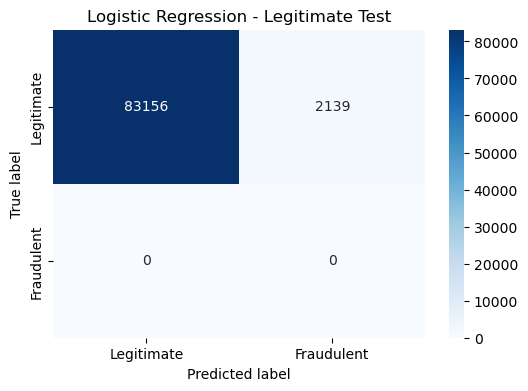

Confusion Matrix for Fraudulent Test Set:


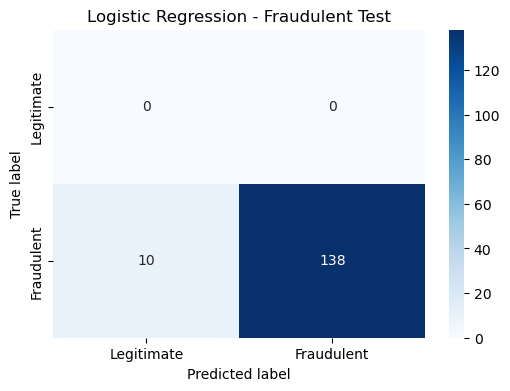

Evaluating AdaBoost...
AdaBoost Legit Accuracy: 0.95764
AdaBoost Fraud Accuracy: 0.91892
Confusion Matrix for Legitimate Test Set:


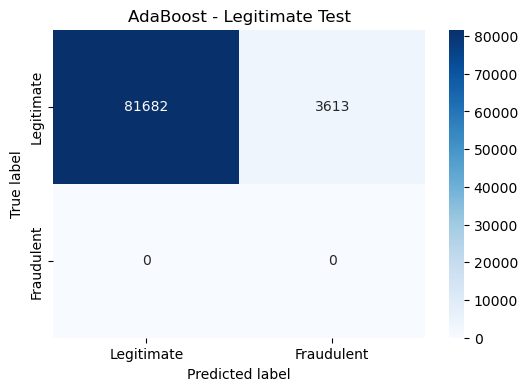

Confusion Matrix for Fraudulent Test Set:


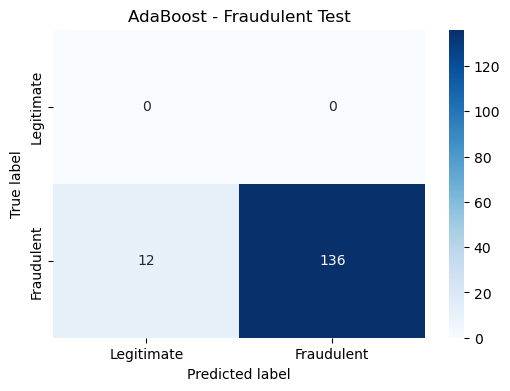

Evaluating GaussianNB...
GaussianNB Legit Accuracy: 0.97707
GaussianNB Fraud Accuracy: 0.85811
Confusion Matrix for Legitimate Test Set:


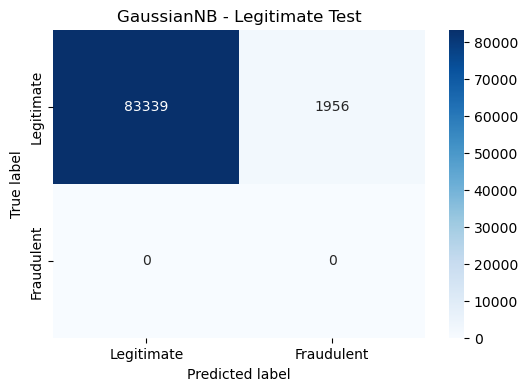

Confusion Matrix for Fraudulent Test Set:


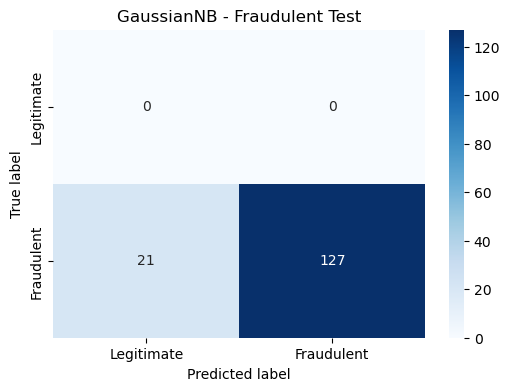

Evaluating KNN...
KNN Legit Accuracy: 0.97994
KNN Fraud Accuracy: 0.91216
Confusion Matrix for Legitimate Test Set:


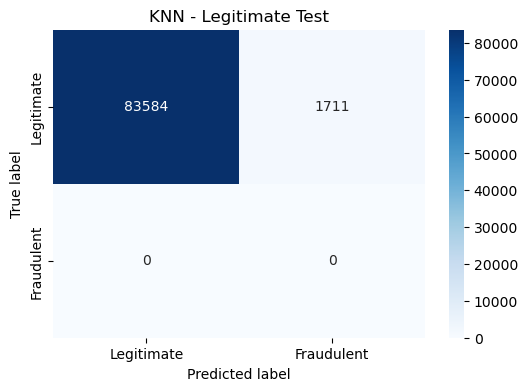

Confusion Matrix for Fraudulent Test Set:


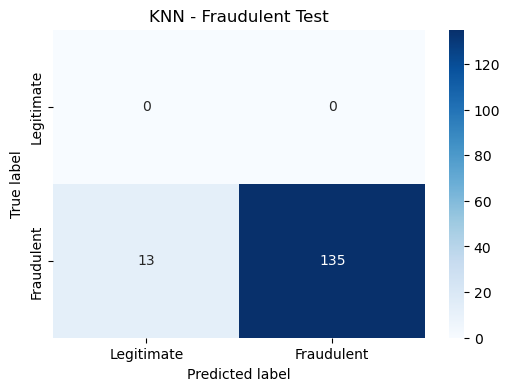

Evaluating XGBoost...


/home/saumyaryan/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [11:07:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Legit Accuracy: 0.96863
XGBoost Fraud Accuracy: 0.91216
Confusion Matrix for Legitimate Test Set:


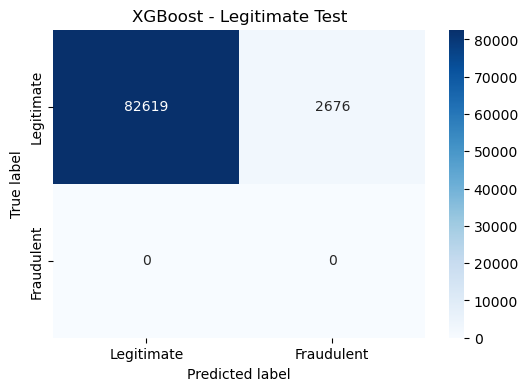

Confusion Matrix for Fraudulent Test Set:


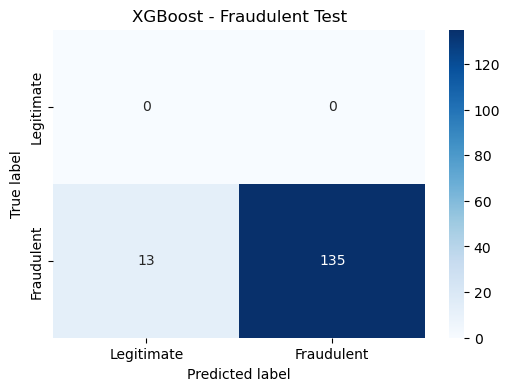

In [15]:
# Using Cluster Centroids undersampling
from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids(random_state=42)
x_train_cc, y_train_cc = cc.fit_resample(x_train, y_train)

results_cc = {}
for model_name, model in models.items():
    print(f"Evaluating {model_name}...")
    
    # Evaluate the model using the undersampled data
    results_cc[model_name] = evaluate_model(model, x_train_rus, y_train_rus, x_legit_test, y_legit_test, x_fraud_test, y_fraud_test)
    
    print(f"{model_name} Legit Accuracy: {results_cc[model_name]['accuracy_legit']:.5f}")
    print(f"{model_name} Fraud Accuracy: {results_cc[model_name]['accuracy_fraud']:.5f}")

    # Access and plot confusion matrix for legitimate test set
    print(f"Confusion Matrix for Legitimate Test Set:")
    plot_confusion_matrix(results_cc[model_name]['confusion_matrix_legit'], title=f'{model_name} - Legitimate Test')

    # Access and plot confusion matrix for fraudulent test set
    print(f"Confusion Matrix for Fraudulent Test Set:")
    plot_confusion_matrix(results_cc[model_name]['confusion_matrix_fraud'], title=f'{model_name} - Fraudulent Test')


In [16]:
print('shape of x_train_rus', x_train_cc.shape)
print('shape of y_train_rus', y_train_cc.shape)

print(results_cc)

shape of x_train_rus (688, 29)
shape of y_train_rus (688,)
{'Decision Tree': {'accuracy_legit': 0.9589542177149891, 'accuracy_fraud': 0.918918918918919, 'confusion_matrix_legit': array([[81794,  3501],
       [    0,     0]]), 'confusion_matrix_fraud': array([[  0,   0],
       [ 12, 136]])}, 'SVM': {'accuracy_legit': 0.9871973738202708, 'accuracy_fraud': 0.8783783783783784, 'confusion_matrix_legit': array([[84203,  1092],
       [    0,     0]]), 'confusion_matrix_fraud': array([[  0,   0],
       [ 18, 130]])}, 'Random Forest': {'accuracy_legit': 0.9802450319479453, 'accuracy_fraud': 0.8986486486486487, 'confusion_matrix_legit': array([[83610,  1685],
       [    0,     0]]), 'confusion_matrix_fraud': array([[  0,   0],
       [ 15, 133]])}, 'Logistic Regression': {'accuracy_legit': 0.9749223283897063, 'accuracy_fraud': 0.9324324324324325, 'confusion_matrix_legit': array([[83156,  2139],
       [    0,     0]]), 'confusion_matrix_fraud': array([[  0,   0],
       [ 10, 138]])}, 'AdaB

Evaluating Decision Tree...
Decision Tree Legit Accuracy: 0.95895
Decision Tree Fraud Accuracy: 0.91892
Confusion Matrix for Legitimate Test Set:


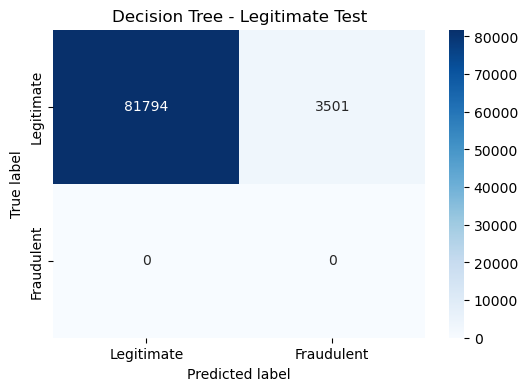

Confusion Matrix for Fraudulent Test Set:


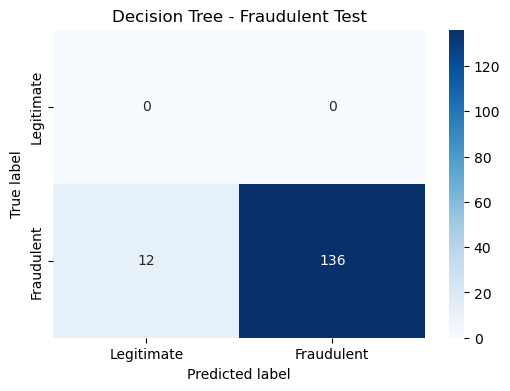

Evaluating SVM...
SVM Legit Accuracy: 0.98720
SVM Fraud Accuracy: 0.87838
Confusion Matrix for Legitimate Test Set:


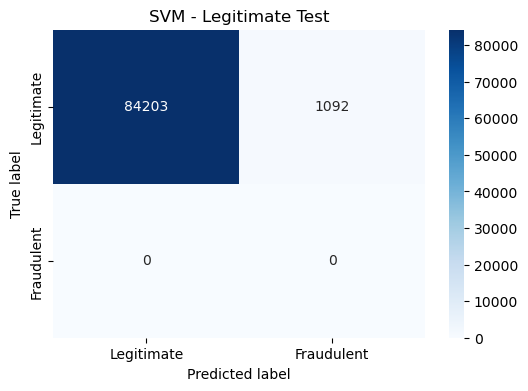

Confusion Matrix for Fraudulent Test Set:


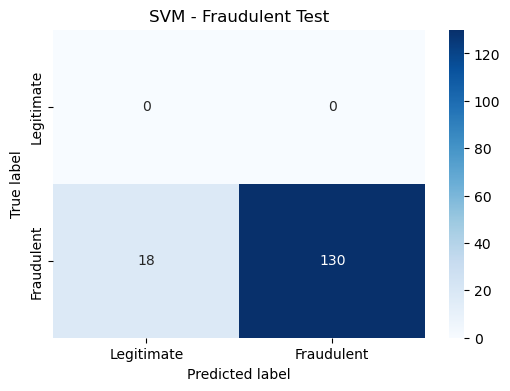

Evaluating Random Forest...
Random Forest Legit Accuracy: 0.98025
Random Forest Fraud Accuracy: 0.89865
Confusion Matrix for Legitimate Test Set:


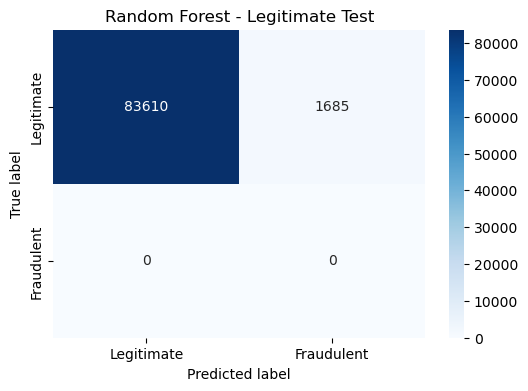

Confusion Matrix for Fraudulent Test Set:


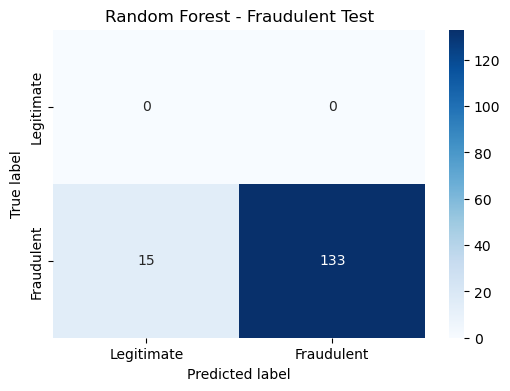

Evaluating Logistic Regression...
Logistic Regression Legit Accuracy: 0.97492
Logistic Regression Fraud Accuracy: 0.93243
Confusion Matrix for Legitimate Test Set:


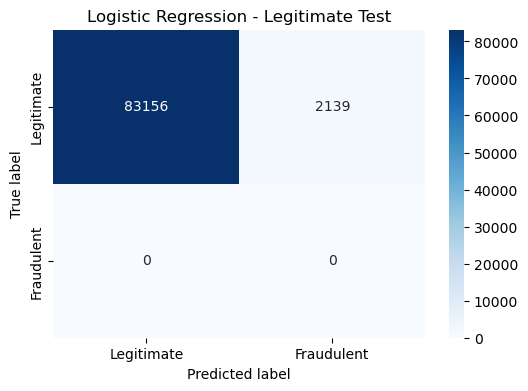

Confusion Matrix for Fraudulent Test Set:


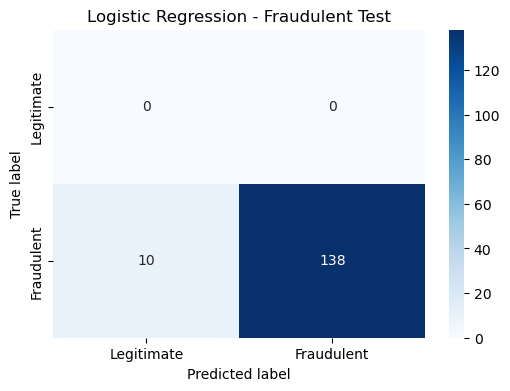

Evaluating AdaBoost...
AdaBoost Legit Accuracy: 0.95764
AdaBoost Fraud Accuracy: 0.91892
Confusion Matrix for Legitimate Test Set:


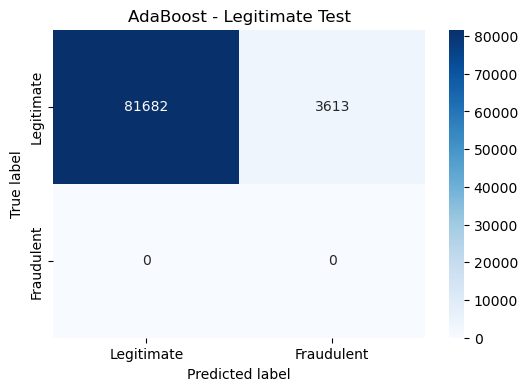

Confusion Matrix for Fraudulent Test Set:


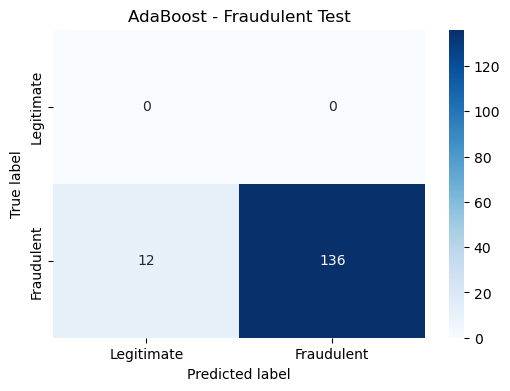

Evaluating GaussianNB...
GaussianNB Legit Accuracy: 0.97707
GaussianNB Fraud Accuracy: 0.85811
Confusion Matrix for Legitimate Test Set:


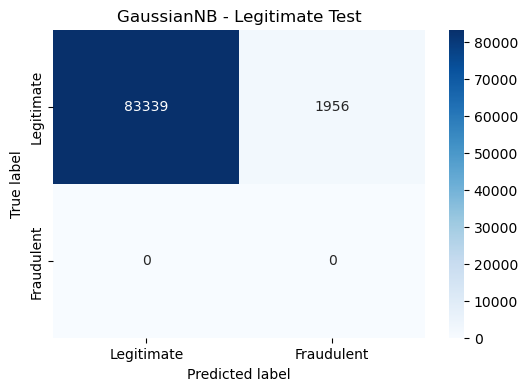

Confusion Matrix for Fraudulent Test Set:


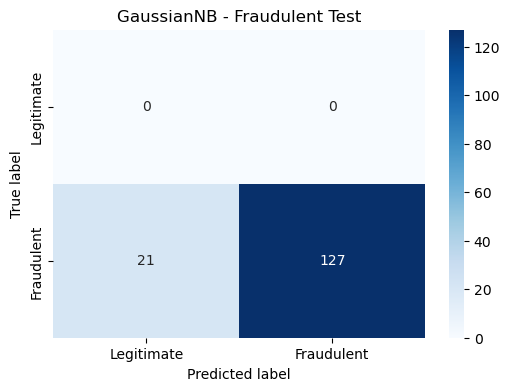

Evaluating KNN...
KNN Legit Accuracy: 0.97994
KNN Fraud Accuracy: 0.91216
Confusion Matrix for Legitimate Test Set:


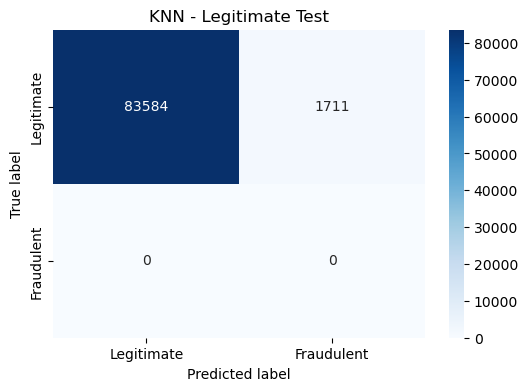

Confusion Matrix for Fraudulent Test Set:


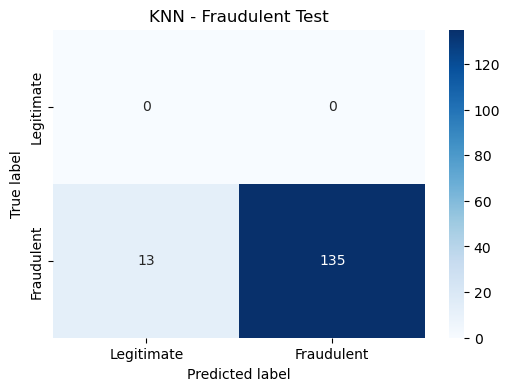

Evaluating XGBoost...
XGBoost Legit Accuracy: 0.96863
XGBoost Fraud Accuracy: 0.91216
Confusion Matrix for Legitimate Test Set:


/home/saumyaryan/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [11:09:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


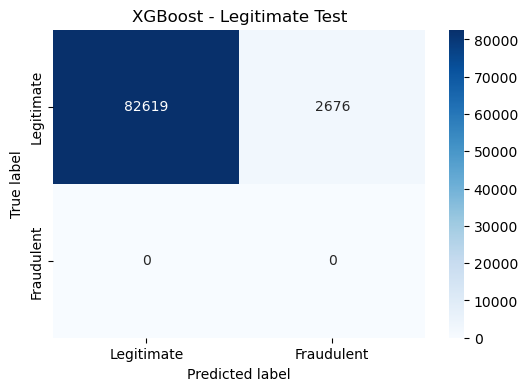

Confusion Matrix for Fraudulent Test Set:


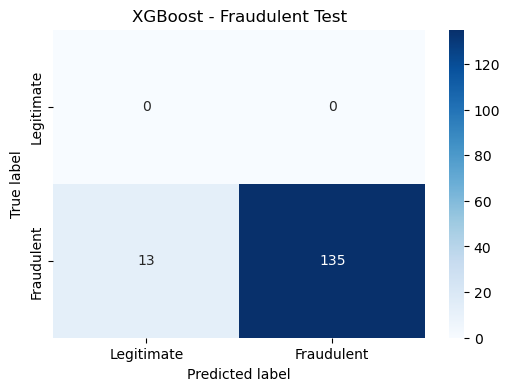

In [17]:
# Using AllKNN undersampling
from imblearn.under_sampling import AllKNN

allknn = AllKNN(n_neighbors=3)
x_train_allknn, y_train_allknn = allknn.fit_resample(x_train, y_train)

results_allknn = {}
for model_name, model in models.items():
    print(f"Evaluating {model_name}...")
    
    # Evaluate the model using the undersampled data
    results_allknn[model_name] = evaluate_model(model, x_train_rus, y_train_rus, x_legit_test, y_legit_test, x_fraud_test, y_fraud_test)
    
    print(f"{model_name} Legit Accuracy: {results_allknn[model_name]['accuracy_legit']:.5f}")
    print(f"{model_name} Fraud Accuracy: {results_allknn[model_name]['accuracy_fraud']:.5f}")

    # Access and plot confusion matrix for legitimate test set
    print(f"Confusion Matrix for Legitimate Test Set:")
    plot_confusion_matrix(results_allknn[model_name]['confusion_matrix_legit'], title=f'{model_name} - Legitimate Test')

    # Access and plot confusion matrix for fraudulent test set
    print(f"Confusion Matrix for Fraudulent Test Set:")
    plot_confusion_matrix(results_allknn[model_name]['confusion_matrix_fraud'], title=f'{model_name} - Fraudulent Test')


In [18]:
print('shape of x_train_rus', x_train_allknn.shape)
print('shape of y_train_rus', y_train_allknn.shape)

print(results_allknn)

shape of x_train_rus (199224, 29)
shape of y_train_rus (199224,)
{'Decision Tree': {'accuracy_legit': 0.9589542177149891, 'accuracy_fraud': 0.918918918918919, 'confusion_matrix_legit': array([[81794,  3501],
       [    0,     0]]), 'confusion_matrix_fraud': array([[  0,   0],
       [ 12, 136]])}, 'SVM': {'accuracy_legit': 0.9871973738202708, 'accuracy_fraud': 0.8783783783783784, 'confusion_matrix_legit': array([[84203,  1092],
       [    0,     0]]), 'confusion_matrix_fraud': array([[  0,   0],
       [ 18, 130]])}, 'Random Forest': {'accuracy_legit': 0.9802450319479453, 'accuracy_fraud': 0.8986486486486487, 'confusion_matrix_legit': array([[83610,  1685],
       [    0,     0]]), 'confusion_matrix_fraud': array([[  0,   0],
       [ 15, 133]])}, 'Logistic Regression': {'accuracy_legit': 0.9749223283897063, 'accuracy_fraud': 0.9324324324324325, 'confusion_matrix_legit': array([[83156,  2139],
       [    0,     0]]), 'confusion_matrix_fraud': array([[  0,   0],
       [ 10, 138]])},

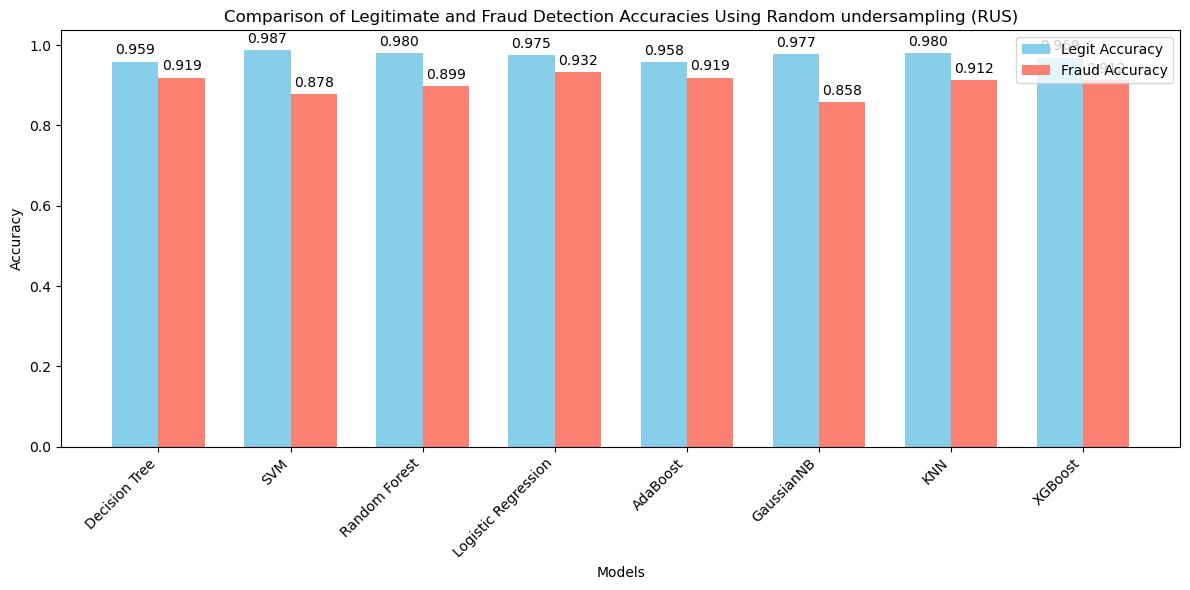

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Accuracy data (replace with your actual data)
results = results_rus

# Extract model names and their accuracy values
models = list(results.keys())
legit_accuracies = [results[model]['accuracy_legit'] for model in models]
fraud_accuracies = [results[model]['accuracy_fraud'] for model in models]

x = np.arange(len(models))  # Model positions
width = 0.35  # Width of the bars

fig, ax = plt.subplots(figsize=(12, 6))

# Plotting legitimate and fraud accuracies
bars1 = ax.bar(x - width/2, legit_accuracies, width, label='Legit Accuracy', color='skyblue')
bars2 = ax.bar(x + width/2, fraud_accuracies, width, label='Fraud Accuracy', color='salmon')

# Add labels and title
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Comparison of Legitimate and Fraud Detection Accuracies Using Random undersampling (RUS)')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha="right")
ax.legend()

# Annotating bars with values
for bar in bars1 + bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.3f}', 
                xy=(bar.get_x() + bar.get_width() / 2, height), 
                xytext=(0, 3), 
                textcoords="offset points", 
                ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()


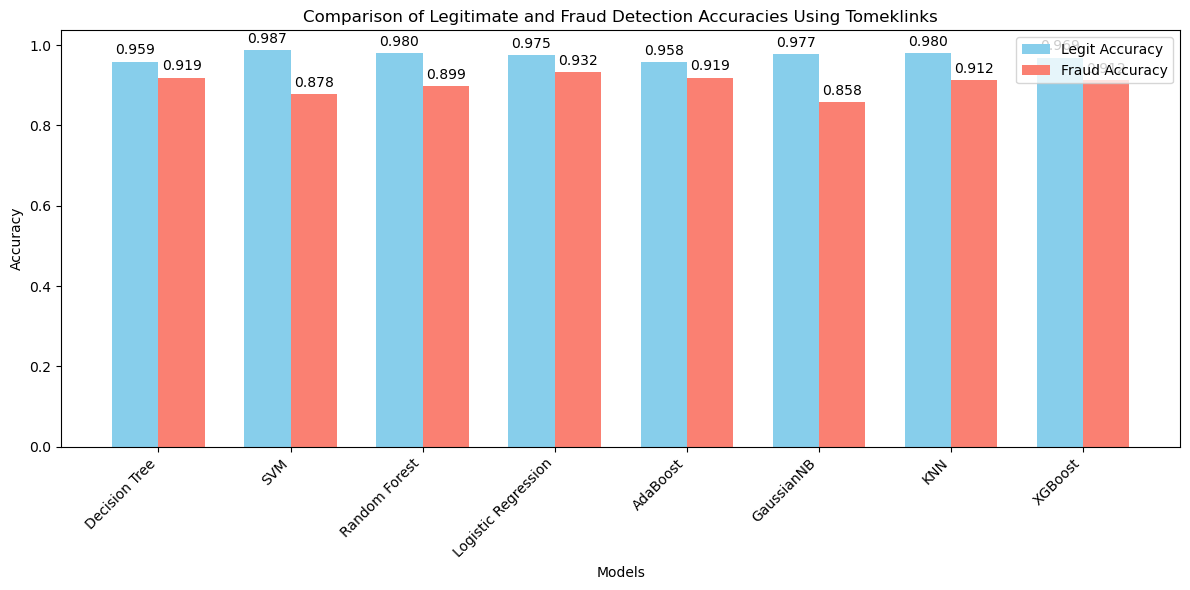

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Accuracy data (replace with your actual data)
results = results_tl

# Extract model names and their accuracy values
models = list(results.keys())
legit_accuracies = [results[model]['accuracy_legit'] for model in models]
fraud_accuracies = [results[model]['accuracy_fraud'] for model in models]

x = np.arange(len(models))  # Model positions
width = 0.35  # Width of the bars

fig, ax = plt.subplots(figsize=(12, 6))

# Plotting legitimate and fraud accuracies
bars1 = ax.bar(x - width/2, legit_accuracies, width, label='Legit Accuracy', color='skyblue')
bars2 = ax.bar(x + width/2, fraud_accuracies, width, label='Fraud Accuracy', color='salmon')

# Add labels and title
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Comparison of Legitimate and Fraud Detection Accuracies Using Tomeklinks')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha="right")
ax.legend()

# Annotating bars with values
for bar in bars1 + bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.3f}', 
                xy=(bar.get_x() + bar.get_width() / 2, height), 
                xytext=(0, 3), 
                textcoords="offset points", 
                ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()


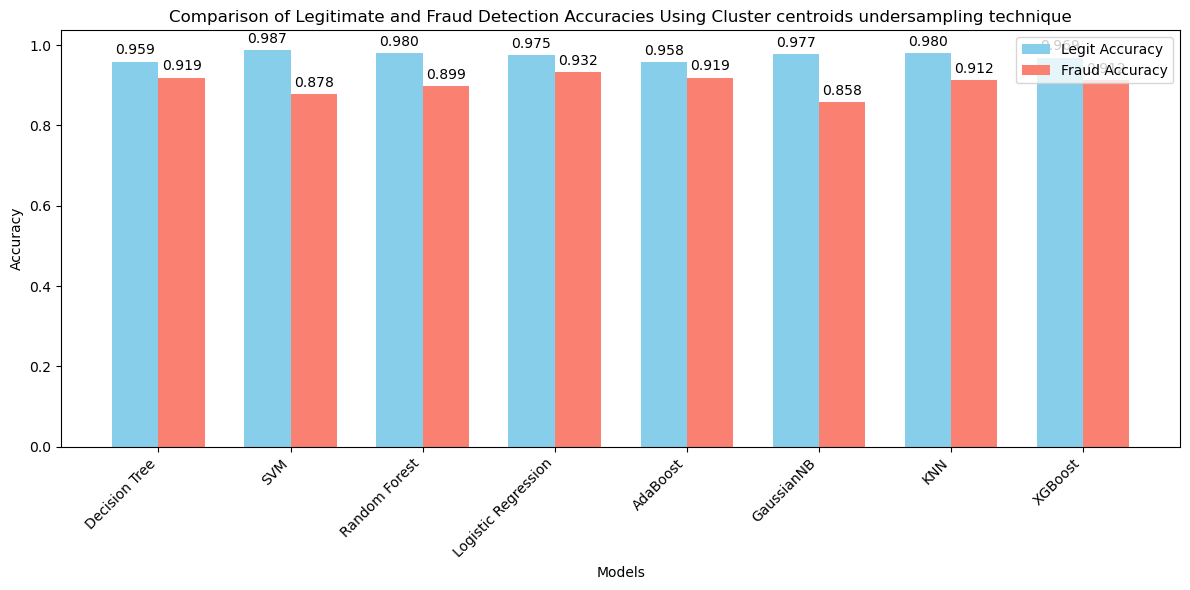

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Accuracy data (replace with your actual data)
results = results_cc

# Extract model names and their accuracy values
models = list(results.keys())
legit_accuracies = [results[model]['accuracy_legit'] for model in models]
fraud_accuracies = [results[model]['accuracy_fraud'] for model in models]

x = np.arange(len(models))  # Model positions
width = 0.35  # Width of the bars

fig, ax = plt.subplots(figsize=(12, 6))

# Plotting legitimate and fraud accuracies
bars1 = ax.bar(x - width/2, legit_accuracies, width, label='Legit Accuracy', color='skyblue')
bars2 = ax.bar(x + width/2, fraud_accuracies, width, label='Fraud Accuracy', color='salmon')

# Add labels and title
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Comparison of Legitimate and Fraud Detection Accuracies Using Cluster centroids undersampling technique')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha="right")
ax.legend()

# Annotating bars with values
for bar in bars1 + bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.3f}', 
                xy=(bar.get_x() + bar.get_width() / 2, height), 
                xytext=(0, 3), 
                textcoords="offset points", 
                ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()


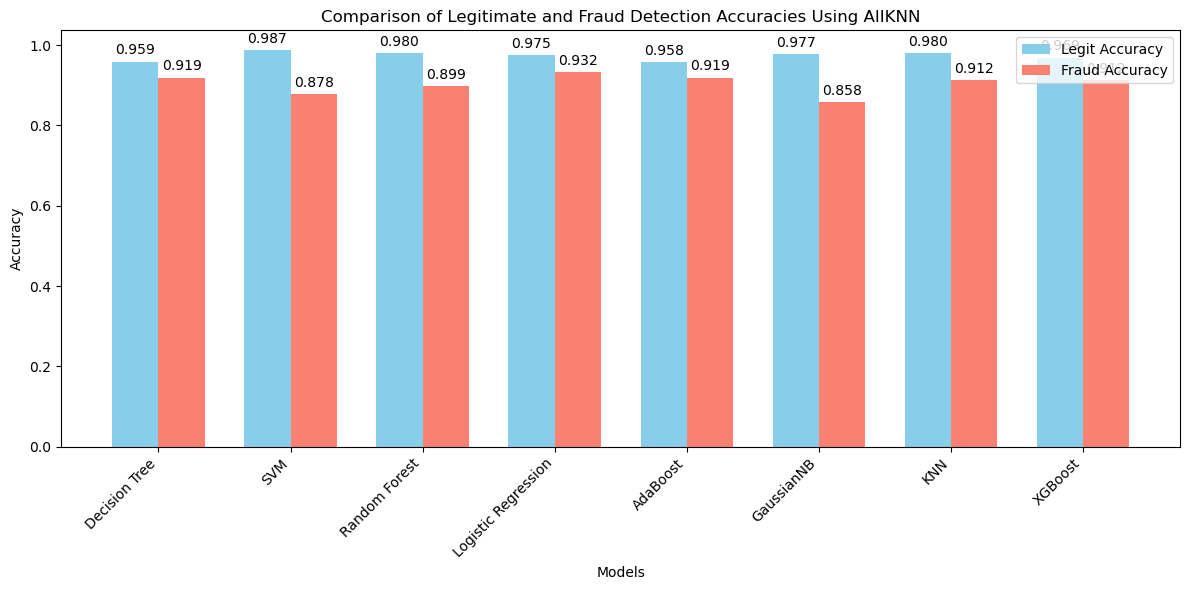

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Accuracy data (replace with your actual data)
results = results_allknn

# Extract model names and their accuracy values
models = list(results.keys())
legit_accuracies = [results[model]['accuracy_legit'] for model in models]
fraud_accuracies = [results[model]['accuracy_fraud'] for model in models]

x = np.arange(len(models))  # Model positions
width = 0.35  # Width of the bars

fig, ax = plt.subplots(figsize=(12, 6))

# Plotting legitimate and fraud accuracies
bars1 = ax.bar(x - width/2, legit_accuracies, width, label='Legit Accuracy', color='skyblue')
bars2 = ax.bar(x + width/2, fraud_accuracies, width, label='Fraud Accuracy', color='salmon')

# Add labels and title
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Comparison of Legitimate and Fraud Detection Accuracies Using AIIKNN')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha="right")
ax.legend()

# Annotating bars with values
for bar in bars1 + bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.3f}', 
                xy=(bar.get_x() + bar.get_width() / 2, height), 
                xytext=(0, 3), 
                textcoords="offset points", 
                ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()


In [23]:
import pandas as pd

# Example data structure for different techniques (replace with actual results)
results = {
    'RUS': results_rus,
    'TomekLinks': results_tl,
    'ClusterCentroids': results_cc,
    'AllKNN': results_allknn
}

# Create a list to store the table data
table_data = []

for technique, models in results.items():
    row = {'Technique': technique}
    for model, acc in models.items():
        row[f'{model} (Legit)'] = f"{acc['accuracy_legit']:.5f}"
        row[f'{model} (Fraud)'] = f"{acc['accuracy_fraud']:.5f}"
    table_data.append(row)

# Convert to DataFrame
df_results = pd.DataFrame(table_data)

# Display the table
print(df_results.to_string(index=False))

# Optional: display table nicely in Jupyter Notebook
from IPython.display import display
display(df_results)


       Technique Decision Tree (Legit) Decision Tree (Fraud) SVM (Legit) SVM (Fraud) Random Forest (Legit) Random Forest (Fraud) Logistic Regression (Legit) Logistic Regression (Fraud) AdaBoost (Legit) AdaBoost (Fraud) GaussianNB (Legit) GaussianNB (Fraud) KNN (Legit) KNN (Fraud) XGBoost (Legit) XGBoost (Fraud)
             RUS               0.95895               0.91892     0.98720     0.87838               0.98025               0.89865                     0.97492                     0.93243          0.95764          0.91892            0.97707            0.85811     0.97994     0.91216         0.96863         0.91216
      TomekLinks               0.95895               0.91892     0.98720     0.87838               0.98025               0.89865                     0.97492                     0.93243          0.95764          0.91892            0.97707            0.85811     0.97994     0.91216         0.96863         0.91216
ClusterCentroids               0.95895               0.91892 

,Technique,Decision Tree (Legit),Decision Tree (Fraud),SVM (Legit),SVM (Fraud),Random Forest (Legit),Random Forest (Fraud),Logistic Regression (Legit),Logistic Regression (Fraud),AdaBoost (Legit),AdaBoost (Fraud),GaussianNB (Legit),GaussianNB (Fraud),KNN (Legit),KNN (Fraud),XGBoost (Legit),XGBoost (Fraud)
0,RUS,0.95895,0.91892,0.98720,0.87838,0.98025,0.89865,0.97492,0.93243,0.95764,0.91892,0.97707,0.85811,0.97994,0.91216,0.96863,0.91216
1,TomekLinks,0.95895,0.91892,0.98720,0.87838,0.98025,0.89865,0.97492,0.93243,0.95764,0.91892,0.97707,0.85811,0.97994,0.91216,0.96863,0.91216
2,ClusterCentroids,0.95895,0.91892,0.98720,0.87838,0.98025,0.89865,0.97492,0.93243,0.95764,0.91892,0.97707,0.85811,0.97994,0.91216,0.96863,0.91216
3,AllKNN,0.95895,0.91892,0.98720,0.87838,0.98025,0.89865,0.97492,0.93243,0.95764,0.91892,0.97707,0.85811,0.97994,0.91216,0.96863,0.91216
